# Embedded System project

## ESE10 : Visual wakewords using DEEP Learning Approach 
(Detect Whether a person is present or not in webcam or cctv images)

### Group Members - Aditi Tiwari (B20EE005) & Dhanushree Sisodiya (B20EE015)



In [1]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! pip install imageAI
! pip install opencv-python
! pip install Pillow
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 1.0 MB/s eta 0:00:00ta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 2.5 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Dependencies

https://medium.com/object-detection-using-tensorflow-and-coco-pre/object-detection-using-tensorflow-and-coco-pre-trained-models-5d8386019a8

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

2023-06-29 00:15:01.409696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-29 00:15:01.409741: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import os 
import keras
import numpy as np 
import tensorflow as tf
from IPython.display import clear_output as cls
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import GlobalAvgPool2D as GAP
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import Model
from keras.layers import  Input
from keras.layers import BatchNormalization
# from keras.optimizers import Adam
# import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
root_path_notp = 'vww/notperson'
root_path_p = 'vww/person'

In [4]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
#gender_labels = []

for filename in tqdm(os.listdir(root_path_notp)):
    image_path = os.path.join(root_path_notp, filename)
    #temp = filename.split('_')
    image_paths.append(image_path)
    age_labels.append(0)

  0%|          | 0/300 [00:00<?, ?it/s]

In [5]:
len(image_paths), len(age_labels)

(300, 300)

In [6]:
for filename in tqdm(os.listdir(root_path_p)):
    image_path = os.path.join(root_path_p, filename)
    #temp = filename.split('_')
    image_paths.append(image_path)
    age_labels.append(1)

  0%|          | 0/300 [00:00<?, ?it/s]

In [7]:
len(image_paths), len(age_labels)

(600, 600)

In [8]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['person'] = image_paths, age_labels
df.head()

,image,person
0,vww/notperson/000000004495.jpg,0
1,vww/notperson/000000016958.jpg,0
2,vww/notperson/000000036844.jpg,0
3,vww/notperson/000000008629.jpg,0
4,vww/notperson/000000010092.jpg,0


In [9]:
df_shuffle = df.sample(frac = 1)

In [10]:
df_shuffle.tail()

,image,person
312,vww/person/000000058705.jpg,1
101,vww/notperson/000000017029.jpg,0
497,vww/person/000000012639.jpg,1
149,vww/notperson/000000066561.jpg,0
446,vww/person/000000008844.jpg,1


In [11]:
# map labels for gender
person_detection = {0:'Not present', 1:'Present'}

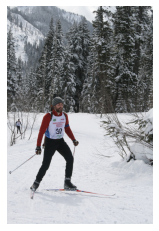

In [12]:
from PIL import Image
img = Image.open(df['image'][400])
plt.axis('off')
plt.imshow(img);

<AxesSubplot:xlabel='person', ylabel='Density'>

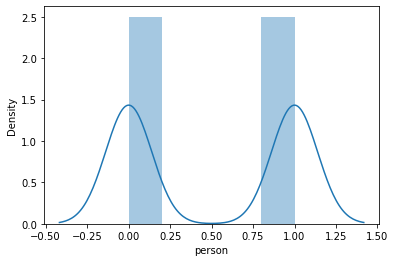

In [13]:
sns.distplot(df['person'])

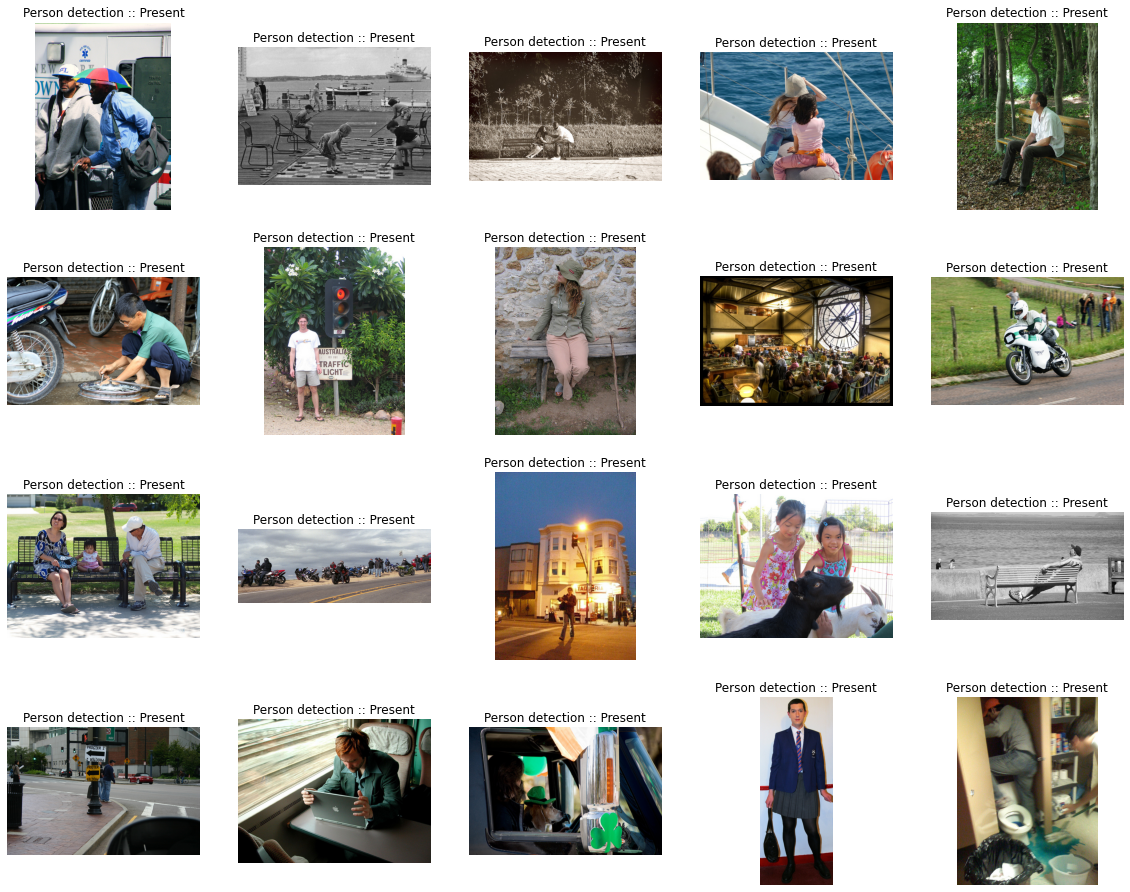

In [14]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[352:372]

for index, file, age in files.itertuples():
    plt.subplot(5, 5, index-351)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Person detection :: {person_detection[age]}")
    plt.axis('off')

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=False)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 1)
    return features

In [16]:
X = extract_features(df_shuffle['image'])

  0%|          | 0/600 [00:00<?, ?it/s]

In [65]:
X.shape

(600, 128, 128, 3)

In [66]:
# normalize the images
# X = X/255.0

In [67]:
y_person = np.array(df_shuffle['person'])

In [68]:
input_shape = (128, 128, 3)

# Impletation of model from pretrained model using VGG16

In [69]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(include_top=False, input_shape = input_shape, # Shape of our images 
weights = 'imagenet')

In [70]:
for layer in base_model.layers:
    layer.trainable = False

In [71]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [72]:
from tensorflow.keras import layers 

In [73]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [74]:
for layer in model.layers:
    weights=layer.get_weights()
    print(np.array(weights).dtype)

float64
object
object
float64
object
object
float64
object
object
object
float64
object
object
object
float64
object
object
object
float64
float64
object
float64
object


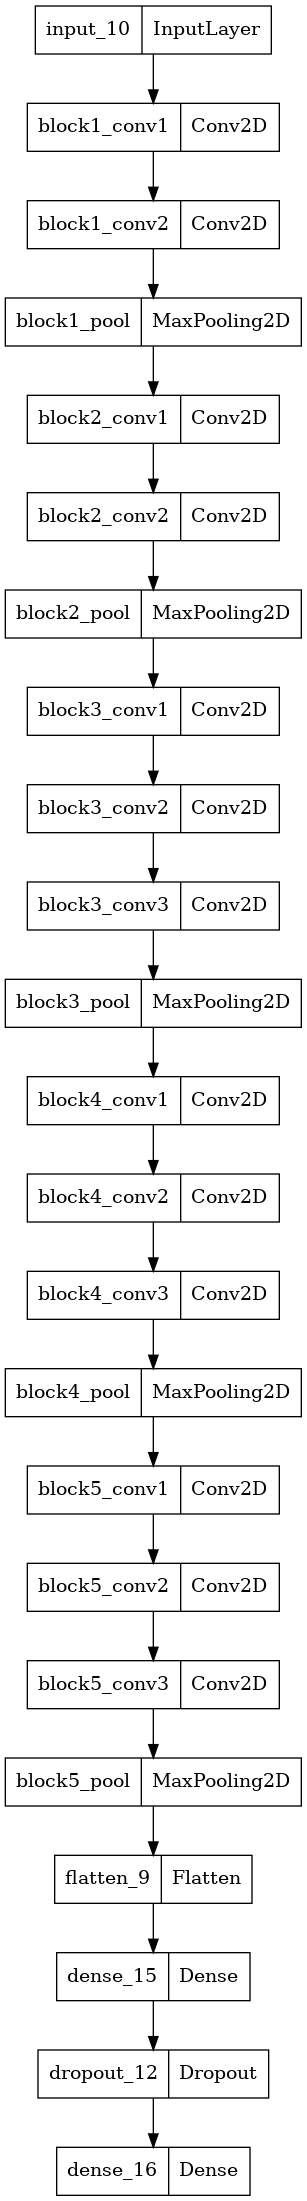

In [75]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [76]:
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
10/10 [==============================] - 4s 314ms/step - loss: 0.7702 - acc: 0.6042 - val_loss: 0.5560 - val_acc: 0.7167
Epoch 2/10
10/10 [==============================] - 3s 292ms/step - loss: 0.5610 - acc: 0.7125 - val_loss: 0.5698 - val_acc: 0.7000
Epoch 3/10
10/10 [==============================] - 3s 291ms/step - loss: 0.4601 - acc: 0.7937 - val_loss: 0.6896 - val_acc: 0.5750
Epoch 4/10
10/10 [==============================] - 3s 291ms/step - loss: 0.4070 - acc: 0.8146 - val_loss: 0.6820 - val_acc: 0.5917
Epoch 5/10
10/10 [==============================] - 3s 290ms/step - loss: 0.4007 - acc: 0.7979 - val_loss: 0.5728 - val_acc: 0.7167
Epoch 6/10
10/10 [==============================] - 3s 292ms/step - loss: 0.3131 - acc: 0.8625 - val_loss: 0.5415 - val_acc: 0.7333
Epoch 7/10
10/10 [==============================] - 3s 290ms/step - loss: 0.2865 - acc: 0.8854 - val_loss: 0.5187 - val_acc: 0.7667
Epoch 8/10
10/10 [==============================] - 3s 288ms/step - loss: 0.

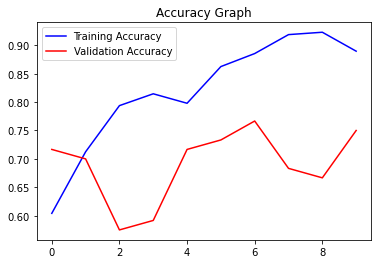

<Figure size 432x288 with 0 Axes>

In [77]:
# plot results for gender
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

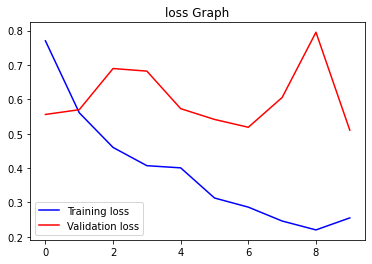

<Figure size 432x288 with 0 Axes>

In [78]:
# plot results for loss
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('loss Graph')
plt.legend()
plt.figure()
plt.show()

Original Detection: Present
Predicted Person: Present


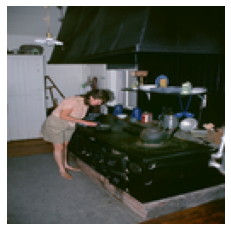

In [79]:
image_index = 9
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Not present


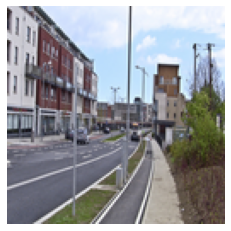

In [80]:
image_index = 12
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Not present


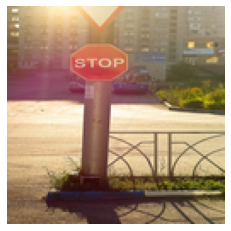

In [81]:
image_index = 8
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

# **Making Deep learning model from scratch**

# Part - 1 (i)

# Effect of Changing the number of layers

First Neural network (7 convolution + 4 dense layer)

In [82]:
input_shape = (128, 128, 3)

In [83]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
conv_2 = Conv2D(54, kernel_size=(3, 3), activation='relu') (conv_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_4 = Conv2D(96, kernel_size=(3, 3), activation='relu') (maxp_2)
conv_5 = Conv2D(128, kernel_size=(3, 3), activation='relu') (conv_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)
conv_6 = Conv2D(156, kernel_size=(3, 3), activation='relu') (maxp_5)
conv_7 = Conv2D(212, kernel_size=(3, 3), activation='relu') (conv_6)
maxp_7 = MaxPooling2D(pool_size=(2, 2)) (conv_7)
conv_8 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_7)
maxp_8 = MaxPooling2D(pool_size=(2, 2)) (conv_8)

flatten = Flatten() (maxp_8)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
dense_2 = Dense(128, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
dense_3 = Dense(32, activation='relu') (dropout_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dense_3)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [84]:
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 9s 812ms/step - loss: 0.6987 - accuracy: 0.5146 - val_loss: 0.6964 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 8s 780ms/step - loss: 0.6904 - accuracy: 0.5146 - val_loss: 0.6938 - val_accuracy: 0.4250
Epoch 3/10
10/10 [==============================] - 8s 793ms/step - loss: 0.6811 - accuracy: 0.5229 - val_loss: 0.9914 - val_accuracy: 0.4250
Epoch 4/10
10/10 [==============================] - 8s 789ms/step - loss: 0.7035 - accuracy: 0.5208 - val_loss: 0.6980 - val_accuracy: 0.4250
Epoch 5/10
10/10 [==============================] - 8s 790ms/step - loss: 0.6909 - accuracy: 0.5083 - val_loss: 0.7030 - val_accuracy: 0.4250
Epoch 6/10
10/10 [==============================] - 8s 792ms/step - loss: 0.6882 - accuracy: 0.5188 - val_loss: 0.7068 - val_accuracy: 0.4250
Epoch 7/10
10/10 [==============================] - 8s 793ms/step - loss: 0.6881 - accuracy: 0.5396 - val_loss: 0.7177 - val_accuracy: 0.4250
Epoch 

In [85]:
model.save('human_detection_model.h5')

In [86]:
from tensorflow import keras
model = keras.models.load_model('human_detection_model.h5')

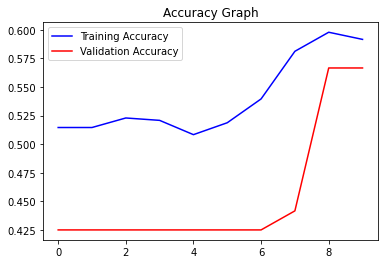

<Figure size 432x288 with 0 Axes>

In [87]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

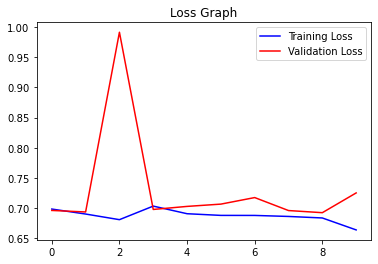

In [88]:
# loss plot for person detection
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [89]:
model.predict(X[image_index].reshape(1, 128, 128, 3))

array([[0.48065668]], dtype=float32)

Original Detection: Present
Predicted Person: Present


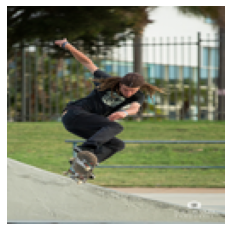

In [90]:
image_index = 13
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Present


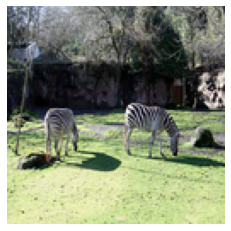

In [91]:
image_index =  500
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Second Neural network (6 convolution + 3 dense layer)

In [92]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(96, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
conv_5 = Conv2D(212, kernel_size=(3, 3), activation='relu') (conv_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)
conv_6 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_5)
maxp_6 = MaxPooling2D(pool_size=(2, 2)) (conv_6)

flatten = Flatten() (maxp_6)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
dense_2 = Dense(128, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_2)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 146ms/step - loss: 0.6972 - accuracy: 0.5083 - val_loss: 0.6957 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6926 - accuracy: 0.5229 - val_loss: 0.6916 - val_accuracy: 0.4250
Epoch 3/10
10/10 [==============================] - 1s 125ms/step - loss: 0.6838 - accuracy: 0.5896 - val_loss: 0.7324 - val_accuracy: 0.4250
Epoch 4/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6568 - accuracy: 0.6479 - val_loss: 0.7813 - val_accuracy: 0.5583
Epoch 5/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6837 - accuracy: 0.5813 - val_loss: 0.7384 - val_accuracy: 0.5500
Epoch 6/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6696 - accuracy: 0.6687 - val_loss: 0.6734 - val_accuracy: 0.6500
Epoch 7/10
10/10 [==============================] - 1s 122ms/step - loss: 0.6253 - accuracy: 0.6500 - val_loss: 0.6697 - val_accuracy: 0.6333
Epoch 

Third Neural Network (4 convolution + 3 dense layer)

In [93]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (conv_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.4) (dense_1)
dense_2 = Dense(64, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_2)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 3s 208ms/step - loss: 0.7559 - accuracy: 0.4938 - val_loss: 0.6949 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 2s 188ms/step - loss: 0.6844 - accuracy: 0.5500 - val_loss: 0.6678 - val_accuracy: 0.5917
Epoch 3/10
10/10 [==============================] - 2s 186ms/step - loss: 0.6630 - accuracy: 0.5979 - val_loss: 0.6876 - val_accuracy: 0.5750
Epoch 4/10
10/10 [==============================] - 2s 186ms/step - loss: 0.6451 - accuracy: 0.6417 - val_loss: 0.6503 - val_accuracy: 0.6583
Epoch 5/10
10/10 [==============================] - 2s 188ms/step - loss: 0.6331 - accuracy: 0.6500 - val_loss: 0.6608 - val_accuracy: 0.6083
Epoch 6/10
10/10 [==============================] - 2s 187ms/step - loss: 0.6129 - accuracy: 0.6729 - val_loss: 0.6645 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 2s 194ms/step - loss: 0.5705 - accuracy: 0.7083 - val_loss: 0.7136 - val_accuracy: 0.5833
Epoch 

Fourth Neural Network (2 convolution + 2 dense layer)

In [94]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)

flatten = Flatten() (maxp_2)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)

output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 3s 290ms/step - loss: 2.5277 - accuracy: 0.4771 - val_loss: 0.6936 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 3s 264ms/step - loss: 0.6723 - accuracy: 0.5542 - val_loss: 0.6868 - val_accuracy: 0.5750
Epoch 3/10
10/10 [==============================] - 3s 272ms/step - loss: 0.5909 - accuracy: 0.6917 - val_loss: 0.9531 - val_accuracy: 0.5583
Epoch 4/10
10/10 [==============================] - 3s 274ms/step - loss: 0.5162 - accuracy: 0.7604 - val_loss: 0.7258 - val_accuracy: 0.6083
Epoch 5/10
10/10 [==============================] - 3s 269ms/step - loss: 0.4095 - accuracy: 0.8229 - val_loss: 0.7547 - val_accuracy: 0.6083
Epoch 6/10
10/10 [==============================] - 3s 276ms/step - loss: 0.2666 - accuracy: 0.9062 - val_loss: 0.9732 - val_accuracy: 0.5667
Epoch 7/10
10/10 [==============================] - 3s 257ms/step - loss: 0.1527 - accuracy: 0.9563 - val_loss: 1.4759 - val_accuracy: 0.4750
Epoch 

# Part - 2 (ii)

# Reducing the size of the neural network design (change of parameters)

First Neural Network ( 512 output channel in last convolution layer)

In [95]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(512, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten = Flatten() (maxp_5)

# fully connected layers
dense_1 = Dense(512, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 156ms/step - loss: 0.6998 - accuracy: 0.5063 - val_loss: 0.6972 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 142ms/step - loss: 0.6824 - accuracy: 0.5396 - val_loss: 0.6652 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 1s 137ms/step - loss: 0.6502 - accuracy: 0.6479 - val_loss: 0.6533 - val_accuracy: 0.5917
Epoch 4/10
10/10 [==============================] - 1s 138ms/step - loss: 0.6218 - accuracy: 0.6771 - val_loss: 0.6759 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 1s 135ms/step - loss: 0.5912 - accuracy: 0.7021 - val_loss: 0.6801 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 1s 139ms/step - loss: 0.6101 - accuracy: 0.6958 - val_loss: 0.6372 - val_accuracy: 0.5833
Epoch 7/10
10/10 [==============================] - 1s 138ms/step - loss: 0.5622 - accuracy: 0.7104 - val_loss: 0.7687 - val_accuracy: 0.5917
Epoch 

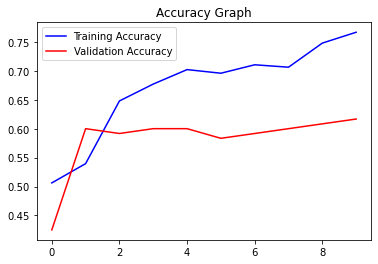

<Figure size 432x288 with 0 Axes>

In [96]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

Second neural network ( 256 output channel in last convolution layer)

In [97]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(212, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten = Flatten() (maxp_5)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 146ms/step - loss: 0.6936 - accuracy: 0.5208 - val_loss: 0.6934 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 125ms/step - loss: 0.6704 - accuracy: 0.5750 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 3/10
10/10 [==============================] - 1s 127ms/step - loss: 0.6382 - accuracy: 0.6521 - val_loss: 0.6689 - val_accuracy: 0.6333
Epoch 4/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6014 - accuracy: 0.6812 - val_loss: 0.7048 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6083 - accuracy: 0.7063 - val_loss: 0.6282 - val_accuracy: 0.5917
Epoch 6/10
10/10 [==============================] - 1s 125ms/step - loss: 0.5938 - accuracy: 0.6875 - val_loss: 0.6395 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 1s 126ms/step - loss: 0.5694 - accuracy: 0.7188 - val_loss: 0.6759 - val_accuracy: 0.6250
Epoch 

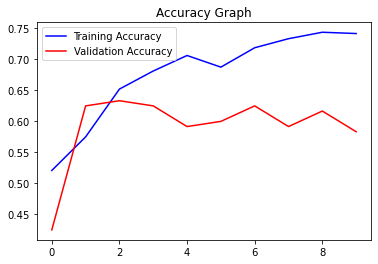

<Figure size 432x288 with 0 Axes>

In [98]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

Third Neural network (128 output channel in last layer)

In [99]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(54, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(128, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 122ms/step - loss: 0.7008 - accuracy: 0.4958 - val_loss: 0.6942 - val_accuracy: 0.4417
Epoch 2/10
10/10 [==============================] - 1s 104ms/step - loss: 0.6777 - accuracy: 0.5833 - val_loss: 0.6614 - val_accuracy: 0.6167
Epoch 3/10
10/10 [==============================] - 1s 106ms/step - loss: 0.6411 - accuracy: 0.6333 - val_loss: 0.6435 - val_accuracy: 0.6250
Epoch 4/10
10/10 [==============================] - 1s 104ms/step - loss: 0.6057 - accuracy: 0.6604 - val_loss: 0.6952 - val_accuracy: 0.6083
Epoch 5/10
10/10 [==============================] - 1s 107ms/step - loss: 0.6105 - accuracy: 0.6812 - val_loss: 0.6224 - val_accuracy: 0.6167
Epoch 6/10
10/10 [==============================] - 1s 106ms/step - loss: 0.5696 - accuracy: 0.7104 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 7/10
10/10 [==============================] - 1s 105ms/step - loss: 0.5606 - accuracy: 0.7167 - val_loss: 0.6274 - val_accuracy: 0.5833
Epoch 

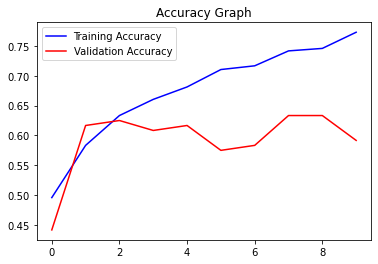

<Figure size 432x288 with 0 Axes>

In [100]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

# Improved model

In [101]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.4) (dense_1)
dense_3 = Dense(32, activation='relu') (dropout_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dense_3)

model = Model(inputs=[inputs], outputs = output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=40, epochs=20, validation_split=0.1, shuffle=True)

Epoch 1/20
14/14 [==============================] - 2s 113ms/step - loss: 0.6981 - accuracy: 0.5185 - val_loss: 0.6869 - val_accuracy: 0.6167
Epoch 2/20
14/14 [==============================] - 1s 101ms/step - loss: 0.6912 - accuracy: 0.5130 - val_loss: 0.7013 - val_accuracy: 0.4667
Epoch 3/20
14/14 [==============================] - 1s 99ms/step - loss: 0.6680 - accuracy: 0.5852 - val_loss: 0.6811 - val_accuracy: 0.5667
Epoch 4/20
14/14 [==============================] - 1s 100ms/step - loss: 0.6573 - accuracy: 0.6407 - val_loss: 0.6942 - val_accuracy: 0.6167
Epoch 5/20
14/14 [==============================] - 1s 101ms/step - loss: 0.6315 - accuracy: 0.6537 - val_loss: 0.7011 - val_accuracy: 0.6167
Epoch 6/20
14/14 [==============================] - 1s 102ms/step - loss: 0.6511 - accuracy: 0.5741 - val_loss: 0.6883 - val_accuracy: 0.5167
Epoch 7/20
14/14 [==============================] - 1s 101ms/step - loss: 0.6538 - accuracy: 0.6444 - val_loss: 0.6835 - val_accuracy: 0.6333
Epoch 8

# Existing Solution (Opencv Haar Cascade face detection model)

# Prediction using web cam and open cv

In [102]:
from tensorflow_model_optimization.quantization.keras import vitis_quantize

In [112]:
train_calib = np.random.rand(100,128,128,3)


# In[ ]:


quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset = train_calib, weight_bit=8, activation_bit=8)


# In[11]:


quantized_model.compile(loss="MeanAbsoluteError",metrics="MeanAbsoluteError")

score = quantized_model.evaluate(X,y_person, verbose=0, batch_size=1)
print(score)


# In[12]:


quantized_model.save('vww_ee005.h5')

[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 1s 155ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
4/4 [==============================] - 4s 143ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.
[0.23678384721279144, 0.23678384721279144]


In [113]:
model3=tf.keras.models.load_model('vww_ee005.h5')

In [114]:
model3.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 quant_input_18 (VitisQuanti  (None, 128, 128, 3)      4         
 ze)                                                             
                                                                 
 quant_conv2d_70 (QuantizeWr  (None, 126, 126, 32)     903       
 apper)                                                          
                                                                 
 quant_conv2d_70_relu (Quant  (None, 126, 126, 32)     4         
 izeWrapper)                                                     
                                                                 
 quant_max_pooling2d_60 (Qua  (None, 63, 63, 32)       4         
 ntizeWrapper)                                            

In [94]:
for layer in model3.layers:
    weights=layer.get_weights()
    #weights[1]
    print(np.array(weights).dtype)
#weights[0]

float64
float64
object
float64
float64
object
float64
float64
object
float64
float64
object
float64
float64
int32
object
float64
object
float64
object
float64


In [ ]:
print

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [ ]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  aval = "Not Present"
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      aval = "Present"
  # save image
  cv2.imwrite(filename, img)
  print(aval)
  return filename


In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
     

In [ ]:
img.shape

# Thank You